<a href="https://colab.research.google.com/github/Bannore-Aaditya/Bannore-Aaditya/blob/main/Copy_of_01_Logistic_Regression_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Python

For this session we will be working with the Titanic Dataset (kaggle). This is a very famous data set and very often usedas a first step in machine learning! 

We will be trying to predict a classification- survival or deceased.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Steps in implementing Logistic Regression

1. Collecting Data
2. Analyzing data
3. Data Wrangling (or Data Cleaning)
4. Training & Testing the data
5. Accuracy Check

## Import Libraries
Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### The Data
Let's start by reading in the titanic.csv file into a pandas dataframe.

In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/titanic.csv')

### Description:
1. survival - Survival (0 = No; 1 = Yes)
2. class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name - Name
4. sex - Gender
5. age - Age
6. sibsp - Number of Siblings/Spouses Aboard
7. parch - Number of Parents/Children Aboard
8. ticket - Ticket Number
9. fare - Passenger Fare
10. cabin - Cabin
11. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
print('No. of passenger: '+str(len(titanic_data['PassengerId'])))

No. of passenger: 891


In [ ]:
print('No. of passenger: '+str(len(titanic_data.index)))

No. of passenger: 891


## Analyzing Data or Exploratory Data Analysis

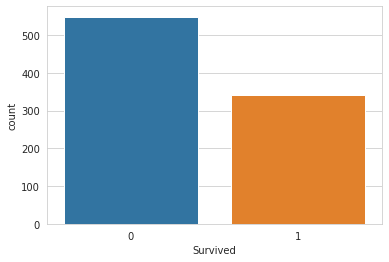

In [ ]:
sns.set_style('whitegrid')

sns.countplot(x='Survived', data=titanic_data)
#sns.countplot(x=titanic_data['Survived'])

#very less survivors than non survivors

In [ ]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

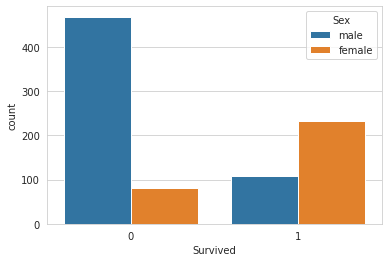

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

#majority of male not survived and majority of female survived. It computes the gender of the survival rate

In [ ]:
table = pd.crosstab(titanic_data['Survived'],titanic_data['Sex'])
print(table)

Sex       female  male
Survived              
0             81   468
1            233   109


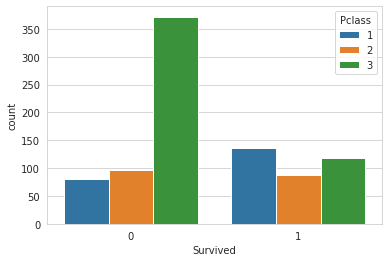

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
#majority of non survivors belongs to third class and the majority of survivors belongs to high class

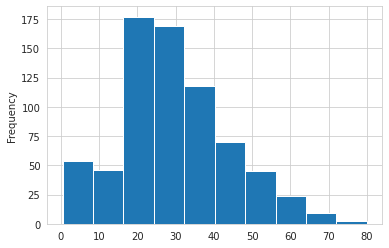

In [ ]:
titanic_data['Age'].plot.hist()

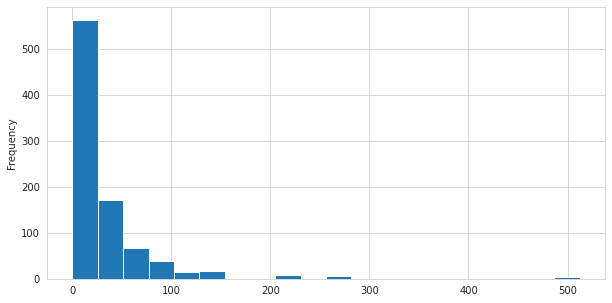

In [ ]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(10,5))

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


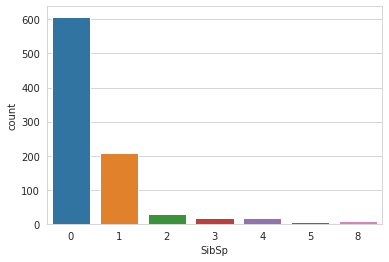

In [ ]:
sns.countplot(x='SibSp', data=titanic_data)

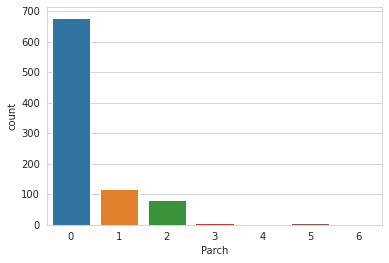

In [ ]:
sns.countplot(x='Parch', data=titanic_data)

## Data Wrangling or Data Cleaning
Clean the data by removing null values (nan) or the unneccesary columns from the dataset

In [ ]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

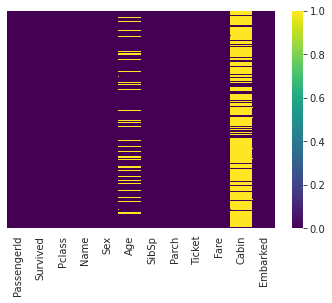

In [ ]:
sns.heatmap(titanic_data.isnull(),yticklabels=False, cmap='viridis')
#cmap for color coding

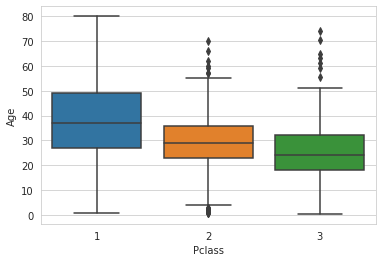

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)
#People travelling in first class are older than the other two classes

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.drop('Cabin', axis =1, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_data.dropna(inplace=True)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

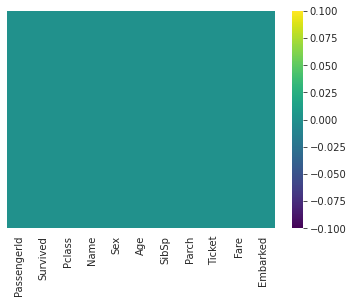

In [ ]:
sns.heatmap(titanic_data.isnull(),yticklabels=False, cmap='viridis')
titanic_data.isnull().sum()

In [ ]:
#pd.get_dummies(titanic_data['Sex'])
sex_new = pd.get_dummies(titanic_data['Sex'], drop_first=True)

# Whenever we apply machine learning we must make sure that there is no string values present
# In "female" column 0 stands for not a "female" and 1 stands for "female" and similarly for 
# "male" column. so two clumns are not required, only one column is sufficient

In [ ]:
#pd.get_dummies(titanic_data['Embarked'])
Embarked_new = pd.get_dummies(titanic_data['Embarked'], drop_first=True)

In [ ]:
#pd.get_dummies(titanic_data['Pclass'])
Pclass_new = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
print(Pclass_new)

     2  3
0    0  1
1    0  0
2    0  1
3    0  0
4    0  1
..  .. ..
885  0  1
886  1  0
887  0  0
889  0  0
890  0  1

[712 rows x 2 columns]


In [ ]:
titanic_data=pd.concat([titanic_data, sex_new, Embarked_new, Pclass_new], axis=1)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [ ]:
titanic_data.drop(['Pclass','Sex','Embarked', 'PassengerId','Name','Ticket'], axis=1, inplace=True)

In [ ]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Training and Testing the data

Build the model on the training data and predict the output on the testing data

1. logmodel = LogisticRegression()
2. logmodel.fit(x_train,y_train)

### Train Data

In [ ]:
x=titanic_data.drop('Survived', axis=1)
y=titanic_data['Survived']
print(y)
print(x)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64
      Age  SibSp  Parch     Fare  male  Q  S  2  3
0    22.0      1      0   7.2500     1  0  1  0  1
1    38.0      1      0  71.2833     0  0  0  0  0
2    26.0      0      0   7.9250     0  0  1  0  1
3    35.0      1      0  53.1000     0  0  1  0  0
4    35.0      0      0   8.0500     1  0  1  0  1
..    ...    ...    ...      ...   ... .. .. .. ..
885  39.0      0      5  29.1250     0  1  0  0  1
886  27.0      0      0  13.0000     1  0  1  1  0
887  19.0      0      0  30.0000     0  0  1  0  0
889  26.0      0      0  30.0000     1  0  0  0  0
890  32.0      0      0   7.7500     1  1  0  0  1

[712 rows x 9 columns]


In [ ]:
#splitting data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(498, 9)
(214, 9)
(498,)
(214,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
# Creates the instance of the Logistic Regression Model

In [ ]:
logmodel.fit(x_train,y_train)
# The above line fits the model to the dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = logmodel.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       126
           1       0.72      0.72      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)
# It is a 2x2 matrix
#recall (sensitivity)= 102/(102+24)
#recall (specificity)= 63/(25+63)

array([[102,  24],
       [ 25,  63]])

1.             Predicted:No   Predicted:Yes
2. Actual:No     TN               FP
3. Actual:Yes    FN               TP

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)*100
# Add TN and TP, divide the resultant by total no. of data points used for predictions, here it is 214
#(102+63)/214 = 0.77102803738

77.10280373831776

In [ ]:
#or
logmodel.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7710280373831776